<a href="https://colab.research.google.com/github/swarangimp05/NNDL-LAB/blob/main/Experiment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> # **Small Image Classification Using Convolutional Neural Network (CNN)**








In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

**Load the dataset**

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 10000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

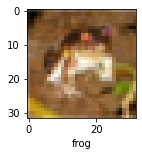

In [10]:
plot_sample(X_train, y_train, 0)

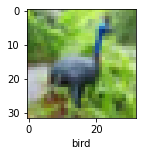

In [11]:
plot_sample(X_train, y_train, 6)

**Normalizing the training data**

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**Build simple artificial neural network for image classification**

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 107s 68ms/step - loss: 1.8160 - accuracy: 0.3523
Epoch 2/5
1563/1563 [==============================] - 104s 67ms/step - loss: 1.6236 - accuracy: 0.4249
Epoch 3/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.5411 - accuracy: 0.4577
Epoch 4/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4842 - accuracy: 0.4766
Epoch 5/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4318 - accuracy: 0.4963


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.46      0.54      1000
           1       0.63      0.59      0.61      1000
           2       0.38      0.38      0.38      1000
           3       0.26      0.60      0.37      1000
           4       0.54      0.25      0.34      1000
           5       0.35      0.38      0.36      1000
           6       0.57      0.44      0.50      1000
           7       0.67      0.40      0.51      1000
           8       0.59      0.64      0.62      1000
           9       0.52      0.59      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.52      0.47      0.48     10000
weighted avg       0.52      0.47      0.48     10000



 **Now let us build a convolutional neural network to train our images**






In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4430 - accuracy: 0.4871
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0972 - accuracy: 0.6168
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9698 - accuracy: 0.6632
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8836 - accuracy: 0.6964
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8138 - accuracy: 0.7197
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7548 - accuracy: 0.7384
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7065 - accuracy: 0.7551
Epoch 8/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6598 - accuracy: 0.7710
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6168 - accuracy: 0.7850
Epoch 10/10
1563/1563 [==============================] - 62s 40m

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9266 - accuracy: 0.7039


[0.9265771508216858, 0.7038999795913696]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[9.20095074e-04, 1.94454115e-04, 1.02372449e-02, 5.75299442e-01,
        8.99391156e-03, 3.18194926e-01, 7.96749741e-02, 3.28755268e-05,
        6.31034980e-03, 1.41734956e-04],
       [8.24171118e-03, 7.50893075e-03, 2.12889404e-06, 2.07623799e-07,
        5.92799871e-08, 1.59081051e-08, 3.07096784e-08, 1.27557612e-07,
        9.84142482e-01, 1.04269224e-04],
       [2.35379767e-02, 9.58826113e-03, 1.08627311e-03, 6.73633534e-03,
        3.09825904e-04, 3.27696675e-03, 1.26253421e-04, 5.22996997e-04,
        9.46815372e-01, 7.99970608e-03],
       [8.51332903e-01, 2.83616624e-04, 5.42716272e-02, 4.68952756e-04,
        1.24247267e-03, 1.35167274e-05, 7.59541290e-04, 4.11481218e-04,
        9.11816210e-02, 3.41911400e-05],
       [5.40060263e-08, 5.47302506e-08, 3.64348223e-03, 5.68565447e-03,
        7.26152509e-02, 1.29596316e-04, 9.17925358e-01, 2.36484198e-07,
        1.53742093e-07, 1.73545587e-08]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

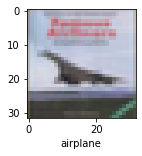

In [22]:
plot_sample(X_test, y_test,3)

In [23]:
classes[y_classes[3]]

'airplane'

In [24]:
classes[y_classes[3]]

'airplane'